In [1]:
!python -V

Python 3.9.13


In [2]:
import os
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import mlflow
import mlflow.sklearn
import optuna
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Set MLflow experiment name
mlflow.set_tracking_uri("sqlite:///mlflow.db")
mlflow.set_experiment('Pamen_DL_GWL_experiment')

<Experiment: artifact_location='file:///D:/RGT/Code/Practice/Deep Learning for GWL Changes/mlruns/1', creation_time=1705882608650, experiment_id='1', last_update_time=1705882608650, lifecycle_stage='active', name='Pamen_DL_GWL_experiment', tags={}>

In [5]:
url = "D:\Groundwater level (GWL) changes\Groundwater level (GWL) changes data\Pamen.csv"
#nsawam_url = "D:\Groundwater level (GWL) changes\Groundwater level (GWL) changes data\Nsawam.csv"
#suhum_url = "D:\Groundwater level (GWL) changes\Groundwater level (GWL) changes data\Suhum.csv"

In [6]:
data = pd.read_csv(url)
data

,Sunlight,Avg_Temp,Spec_Hum,Rel_Hum,Precipitation,Wind_Speed,Soil_Moisture,Rainfall,GWL
0,19.71,27.26,14.89,68.69,0.00,1.49,0.52,379.60,407.0
1,19.67,27.22,14.34,67.00,0.00,1.40,0.52,401.30,407.0
2,20.42,27.65,14.53,66.56,0.00,1.73,0.52,405.50,406.7
3,19.79,27.52,15.01,68.06,0.00,1.23,0.52,397.90,406.9
4,19.24,27.79,14.89,66.75,0.00,1.33,0.52,384.90,406.5
...,...,...,...,...,...,...,...,...,...
4013,20.87,24.98,8.42,45.62,0.00,1.10,0.55,348.78,443.9
4014,19.13,26.27,13.85,67.75,0.02,1.27,0.55,372.94,443.9
4015,19.32,25.70,11.66,59.44,0.00,1.12,0.54,366.63,444.5
4016,18.44,25.83,13.43,67.75,0.01,1.37,0.54,367.59,444.4


In [8]:
data.describe()

,Sunlight,Avg_Temp,Spec_Hum,Rel_Hum,Precipitation,Wind_Speed,Soil_Moisture,Rainfall,GWL
count,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000
mean,17.668096,26.109019,16.348838,78.168447,3.232414,1.919881,0.582723,406.608325,421.594475
std,3.119450,1.653947,1.793582,10.054976,3.980853,0.532000,0.079789,11.092558,24.203485
min,2.780000,20.590000,4.460000,24.120000,0.000000,0.580000,0.470000,340.440000,319.700000
25%,15.950000,24.860000,15.870000,72.810000,0.550000,1.510000,0.520000,402.007500,413.900000
50%,17.980000,25.980000,16.660000,80.620000,1.980000,1.880000,0.580000,408.120000,428.100000
75%,19.750000,27.270000,17.460000,85.940000,4.370000,2.270000,0.630000,413.347500,437.000000
max,26.520000,31.960000,19.780000,94.560000,53.890000,3.990000,0.850000,434.500000,459.000000


In [9]:
data.isnull().sum()

Sunlight         0
Avg_Temp         0
Spec_Hum         0
Rel_Hum          0
Precipitation    0
Wind_Speed       0
Soil_Moisture    0
Rainfall         0
GWL              0
dtype: int64

In [10]:
data.head(10)

,Sunlight,Avg_Temp,Spec_Hum,Rel_Hum,Precipitation,Wind_Speed,Soil_Moisture,Rainfall,GWL
0,19.71,27.26,14.89,68.69,0.00,1.49,0.52,379.6,407.0
1,19.67,27.22,14.34,67.00,0.00,1.40,0.52,401.3,407.0
2,20.42,27.65,14.53,66.56,0.00,1.73,0.52,405.5,406.7
3,19.79,27.52,15.01,68.06,0.00,1.23,0.52,397.9,406.9
4,19.24,27.79,14.89,66.75,0.00,1.33,0.52,384.9,406.5
5,18.97,27.30,15.56,69.88,0.05,1.54,0.51,394.7,407.0
6,18.95,26.97,15.81,72.19,0.03,1.41,0.51,411.8,406.9
7,18.41,26.87,14.22,67.12,0.06,1.57,0.51,407.3,406.3
8,20.55,27.12,13.55,64.31,0.05,0.81,0.51,390.4,406.6
9,17.65,27.30,12.51,59.31,0.10,1.35,0.50,403.3,406.4


In [11]:
data.tail(10)

,Sunlight,Avg_Temp,Spec_Hum,Rel_Hum,Precipitation,Wind_Speed,Soil_Moisture,Rainfall,GWL
4008,18.81,27.05,15.87,72.94,0.13,0.97,0.56,396.07,443.1
4009,17.73,26.38,16.36,76.62,0.12,1.15,0.55,393.32,443.3
4010,19.32,27.17,14.47,66.88,0.08,1.06,0.55,393.20,443.7
4011,19.15,26.97,12.08,57.81,0.07,1.17,0.55,392.55,443.7
4012,20.09,25.05,9.95,54.38,0.01,1.91,0.55,364.95,443.9
4013,20.87,24.98,8.42,45.62,0.00,1.10,0.55,348.78,443.9
4014,19.13,26.27,13.85,67.75,0.02,1.27,0.55,372.94,443.9
4015,19.32,25.70,11.66,59.44,0.00,1.12,0.54,366.63,444.5
4016,18.44,25.83,13.43,67.75,0.01,1.37,0.54,367.59,444.4
4017,16.70,25.30,11.78,61.94,0.00,1.16,0.54,364.47,444.4


In [12]:
data = data.astype('float32')

In [13]:
data.head()

,Sunlight,Avg_Temp,Spec_Hum,Rel_Hum,Precipitation,Wind_Speed,Soil_Moisture,Rainfall,GWL
0,19.709999,27.260000,14.89,68.690002,0.0,1.49,0.52,379.600006,407.000000
1,19.670000,27.219999,14.34,67.000000,0.0,1.40,0.52,401.299988,407.000000
2,20.420000,27.650000,14.53,66.559998,0.0,1.73,0.52,405.500000,406.700012
3,19.790001,27.520000,15.01,68.059998,0.0,1.23,0.52,397.899994,406.899994
4,19.240000,27.790001,14.89,66.750000,0.0,1.33,0.52,384.899994,406.500000


In [14]:
corr_matrix = data.corr()['GWL']
print(corr_matrix)

Sunlight         0.065483
Avg_Temp         0.198594
Spec_Hum        -0.028607
Rel_Hum         -0.149698
Precipitation   -0.098030
Wind_Speed      -0.039080
Soil_Moisture   -0.081045
Rainfall        -0.088520
GWL              1.000000
Name: GWL, dtype: float64


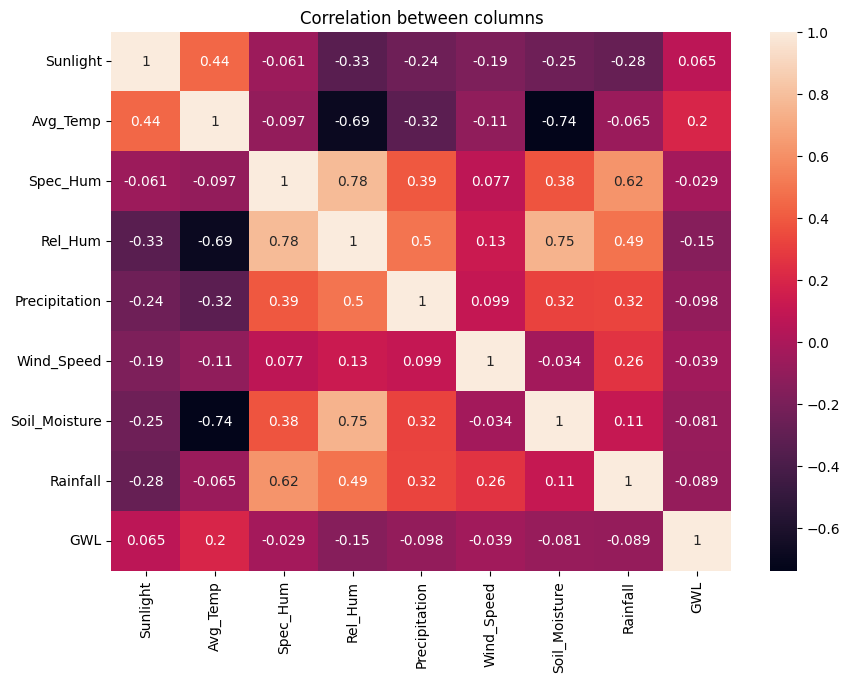

In [15]:
plt.figure(figsize=(10, 7))
sns.heatmap(data.corr(), annot=True)
plt.title('Correlation between columns')
plt.show()

# Lighter color -> higher correlation value
# Darker color -> lower correlation value

In [16]:
x = data.drop(columns = 'GWL')
x

,Sunlight,Avg_Temp,Spec_Hum,Rel_Hum,Precipitation,Wind_Speed,Soil_Moisture,Rainfall
0,19.709999,27.260000,14.89,68.690002,0.00,1.49,0.52,379.600006
1,19.670000,27.219999,14.34,67.000000,0.00,1.40,0.52,401.299988
2,20.420000,27.650000,14.53,66.559998,0.00,1.73,0.52,405.500000
3,19.790001,27.520000,15.01,68.059998,0.00,1.23,0.52,397.899994
4,19.240000,27.790001,14.89,66.750000,0.00,1.33,0.52,384.899994
...,...,...,...,...,...,...,...,...
4013,20.870001,24.980000,8.42,45.619999,0.00,1.10,0.55,348.779999
4014,19.129999,26.270000,13.85,67.750000,0.02,1.27,0.55,372.940002
4015,19.320000,25.700001,11.66,59.439999,0.00,1.12,0.54,366.630005
4016,18.440001,25.830000,13.43,67.750000,0.01,1.37,0.54,367.589996


In [17]:
y = data['GWL']
y

0       407.000000
1       407.000000
2       406.700012
3       406.899994
4       406.500000
           ...    
4013    443.899994
4014    443.899994
4015    444.500000
4016    444.399994
4017    444.399994
Name: GWL, Length: 4018, dtype: float32

In [18]:
data.shape

(4018, 9)

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [20]:
x_test, x_val, y_test, y_val = train_test_split(x_train, y_train, test_size = 0.5, random_state = 42)

In [21]:
print('x_train', x_train.shape)
print('x_test', x_test.shape)
print('x_val', x_val.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)
print('y_val', y_val.shape)

x_train (3214, 8)
x_test (1607, 8)
x_val (1607, 8)
y_train (3214,)
y_test (1607,)
y_val (1607,)


In [22]:
# Scaling data into numpy arrays
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_val = scaler.transform(x_val)

In [23]:
x_train

array([[ 4.7818266e-02, -5.2952007e-03,  9.5399731e-01, ...,
        -1.4290426e+00,  1.8475393e+00, -2.3641244e-01],
       [-1.4521008e+00, -4.7886103e-02,  6.5006858e-01, ...,
         2.0458348e+00, -6.7202872e-01, -4.6342827e-02],
       [ 1.1904600e+00, -8.7537050e-01, -3.2291729e+00, ...,
        -5.0866961e-01,  3.3579883e-01, -5.9331350e+00],
       ...,
       [ 9.6098796e-02,  3.7194067e-01,  1.0203096e+00, ...,
         1.8955699e+00, -4.2007145e-01,  2.0874612e+00],
       [-5.7339311e-01, -6.9283658e-01, -5.6564850e-01, ...,
         2.2336657e+00,  8.3841562e-02, -3.6013767e-01],
       [-2.8692785e-01, -5.7723302e-01,  2.7982756e-01, ...,
        -9.7824764e-01,  7.1373355e-01,  1.1503630e-01]], dtype=float32)

In [24]:
x_test

array([[-0.40280157, -0.8449476 ,  0.51191896, ...,  1.1818112 ,
         1.0916691 ,  0.50503904],
       [ 1.0488366 ,  1.0838203 ,  0.6500686 , ...,  1.1254619 ,
        -0.92398524,  0.38400334],
       [-0.47683176, -0.8023567 ,  0.37929544, ..., -1.2224282 ,
         0.9656908 ,  0.01641451],
       ...,
       [ 0.47268787,  1.1081575 , -0.32803097, ..., -0.28327218,
        -0.798007  , -0.38703603],
       [ 0.7044347 , -0.03571694,  0.74953645, ..., -1.1660789 ,
         2.099496  , -0.6237256 ],
       [ 0.86215144, -0.12089992,  0.7826921 , ...,  0.48683596,
         0.46177706,  0.9577991 ]], dtype=float32)

In [25]:
x_val

array([[ 0.06069279,  0.74917537, -1.2729743 , ..., -0.92189837,
        -1.0499635 , -2.1622174 ],
       [ 1.171148  ,  0.6335718 ,  0.6500686 , ...,  0.5619684 ,
        -0.04213669, -0.37179336],
       [ 0.05103644, -1.3012806 ,  0.34613878, ...,  0.16752274,
         1.595582  ,  0.14193465],
       ...,
       [-1.2267911 , -1.173508  ,  0.00905444, ...,  2.4590635 ,
         0.46177706,  1.334354  ],
       [-0.9338886 , -0.72934407,  0.9539973 , ..., -0.24570596,
         0.9656908 ,  1.5584933 ],
       [ 0.41153222, -0.425122  ,  1.0534652 , ...,  0.28022137,
         1.4696038 ,  0.8860756 ]], dtype=float32)

In [26]:
print(x_train.shape[1])

8


In [27]:
# Start MLflow run
with mlflow.start_run():

    # Log parameters
    mlflow.set_tag("programmer", "Berchie")
    mlflow.log_param("Data-path", "D:\Groundwater level (GWL) changes\Groundwater level (GWL) changes data\Pamen.csv")
    mlflow.log_param('epochs', 2000)
    mlflow.log_param('batch_size', 50)
    #Feed forward neural network model architecture
    model = Sequential()
    model.add(Input(shape=(x_train.shape[1],)))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(500, activation='relu'))
    model.add(Dense(250, activation='linear'))
    model.add(Dense(1, activation='linear'))
    
    # Log the model architecture using mlflow.tensorflow
    mlflow.tensorflow.log_model(model, 'model')
    
    model.summary()
    
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

    earlyStop = EarlyStopping(monitor='val_loss',
                             mode='min',
                             patience=500)

    history = model.fit(x_train, y_train,
                        epochs=2000,
                        callbacks=[earlyStop],
                        batch_size=50,
                        validation_data=(x_val, y_val),
                        verbose=1)
    # Log metrics
    mlflow.log_metric('final_training_loss', history.history['loss'][-1])
    mlflow.log_metric('final_validation_loss', history.history['val_loss'][-1])
    
    # Log MAE metrics
    train_preds = model.predict(x_train)
    val_preds = model.predict(x_val)
    test_preds = model.predict(x_test)
    
    mlflow.log_metric('train_mae', mean_absolute_error(y_train, train_preds))
    mlflow.log_metric('val_mae', mean_absolute_error(y_val, val_preds))
    mlflow.log_metric('test_mae', mean_absolute_error(y_test, test_preds))
    
    # Plot and save training/validation loss
    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    loss_plot_path = 'D:\RGT\Code\Practice\Deep Learning for GWL Changes\Artifacts\loss_plot.png'
    plt.savefig(loss_plot_path)
    mlflow.log_artifact(loss_plot_path)
    plt.close()
    
    # Log scatter plots
    fig, axes = plt.subplots(1, 2)

    # Training Results
    axes[0].scatter(x=y_train, y=train_preds)
    axes[0].set_xlabel("Actual", fontsize=10)
    axes[0].set_ylabel("Predicted", fontsize=10)
    axes[0].set_title("Training")

    x = np.linspace(*axes[0].get_xlim())
    axes[0].plot(x, x, color='red')

    # Validation Results
    axes[1].scatter(x=y_test, y=test_preds)
    axes[1].set_xlabel("Actual", fontsize=10)
    axes[1].set_ylabel("Predicted", fontsize=10)
    axes[1].set_title("Validation")

    x = np.linspace(*axes[1].get_xlim())
    axes[1].plot(x, x, color='red')

    # Tight layout
    fig.tight_layout()

    # Save scatter plot
    scatter_plot_path = 'D:\RGT\Code\Practice\Deep Learning for GWL Changes\Artifacts\scatter_plot.png'
    plt.savefig(scatter_plot_path)
    mlflow.log_artifact(scatter_plot_path)
    plt.close()

2024/01/21 16:38:54 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\SAMBER~1\AppData\Local\Temp\tmp0hhf7me9\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\SAMBER~1\AppData\Local\Temp\tmp0hhf7me9\model\data\model\assets


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              9000      
                                                                 
 dense_1 (Dense)             (None, 500)               500500    
                                                                 
 dense_2 (Dense)             (None, 250)               125250    
                                                                 
 dense_3 (Dense)             (None, 1)                 251       
                                                                 
Total params: 635001 (2.42 MB)
Trainable params: 635001 (2.42 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________



Epoch 1/2000



65/65 [==============================] - 1s 9ms/step - loss: 25748.1523 - mae: 112.6750 - val_loss: 5121.2002 - val_mae: 56.6025
Epoch 2/2000
65/65 [==============================] - 0s 6ms/step - loss: 3618.1030 - mae: 47.2316 - val_loss: 3099.3455 - val_mae: 45.8186
Epoch 3/2000
65/65 [==============================] - 0s 6ms/step - loss: 2342.4453 - mae: 38.3043 - val_loss: 2027.1162 - val_mae: 34.5498
Epoch 4/2000
65/65 [==============================] - 0s 6ms/step - loss: 1497.0325 - mae: 30.4591 - val_loss: 998.8273 - val_mae: 23.9948
Epoch 5/2000
65/65 [==============================] - 0s 6ms/step - loss: 1385.1212 - mae: 29.1186 - val_loss: 783.4960 - val_mae: 22.7850
Epoch 6/2000
65/65 [==============================] - 0s 5ms/step - loss: 1169.9891 - mae: 26.4455 - val_loss: 1410.1956 - val_mae: 28.6978
Epoch 7/2000
65/65 [==============================] - 0s 5ms/step - loss: 1094.1755 - mae: 25.8658 - val_loss: 613.7507 - val_mae: 18.6009
Epoch 8/2000
65/65 [==============